# Dynamic Travel Planner Role-Playing: Multi-Agent System with Real-Time Insights Powered by Dappier


You can also check this cookbook in colab [here](https://colab.research.google.com/drive/1yYFcgQ0rdAvepTclqLvZR8icqsW4uc-P?usp=sharing)

<div class="align-center">
  <a href="https://www.camel-ai.org/"><img src="https://i.postimg.cc/KzQ5rfBC/button.png"width="150"></a>
  <a href="https://discord.camel-ai.org"><img src="https://i.postimg.cc/L4wPdG9N/join-2.png"  width="150"></a></a>
  
⭐ <i>Star us on [*Github*](https://github.com/camel-ai/camel), join our [*Discord*](https://discord.camel-ai.org) or follow our [*X*](https://x.com/camelaiorg)
</div>

This notebook demonstrates how to set up and leverage CAMEL's Retrieval-Augmented Generation (RAG) combined with Dappier for dynamic travel planning. By combining real-time weather data and multi-agent role-playing, this notebook walks you through an innovative approach to creating adaptive travel plans.

In this notebook, you'll explore:

* **CAMEL**: A powerful multi-agent framework that enables Retrieval-Augmented Generation and multi-agent role-playing scenarios, allowing for sophisticated AI-driven tasks.
* **Dappier**: A platform connecting LLMs and Agentic AI agents to real-time, rights-cleared data from trusted sources, specializing in domains like web search, finance, and news. It delivers enriched, prompt-ready data, empowering AI with verified and up-to-date information for diverse applications.
* **OpenAI**: A leading provider of advanced AI models capable of natural language understanding, contextual reasoning, and content generation. It enables intelligent, human-like interactions and supports a wide range of applications across various domains.
* **AgentOps**: Track and analysis the running of CAMEL Agents.


This setup not only demonstrates a practical application of AI-driven dynamic travel planning but also provides a flexible framework that can be adapted to other real-world scenarios requiring real-time data integration from Dappier RAG models, multi-agent collaboration, and contextual reasoning.

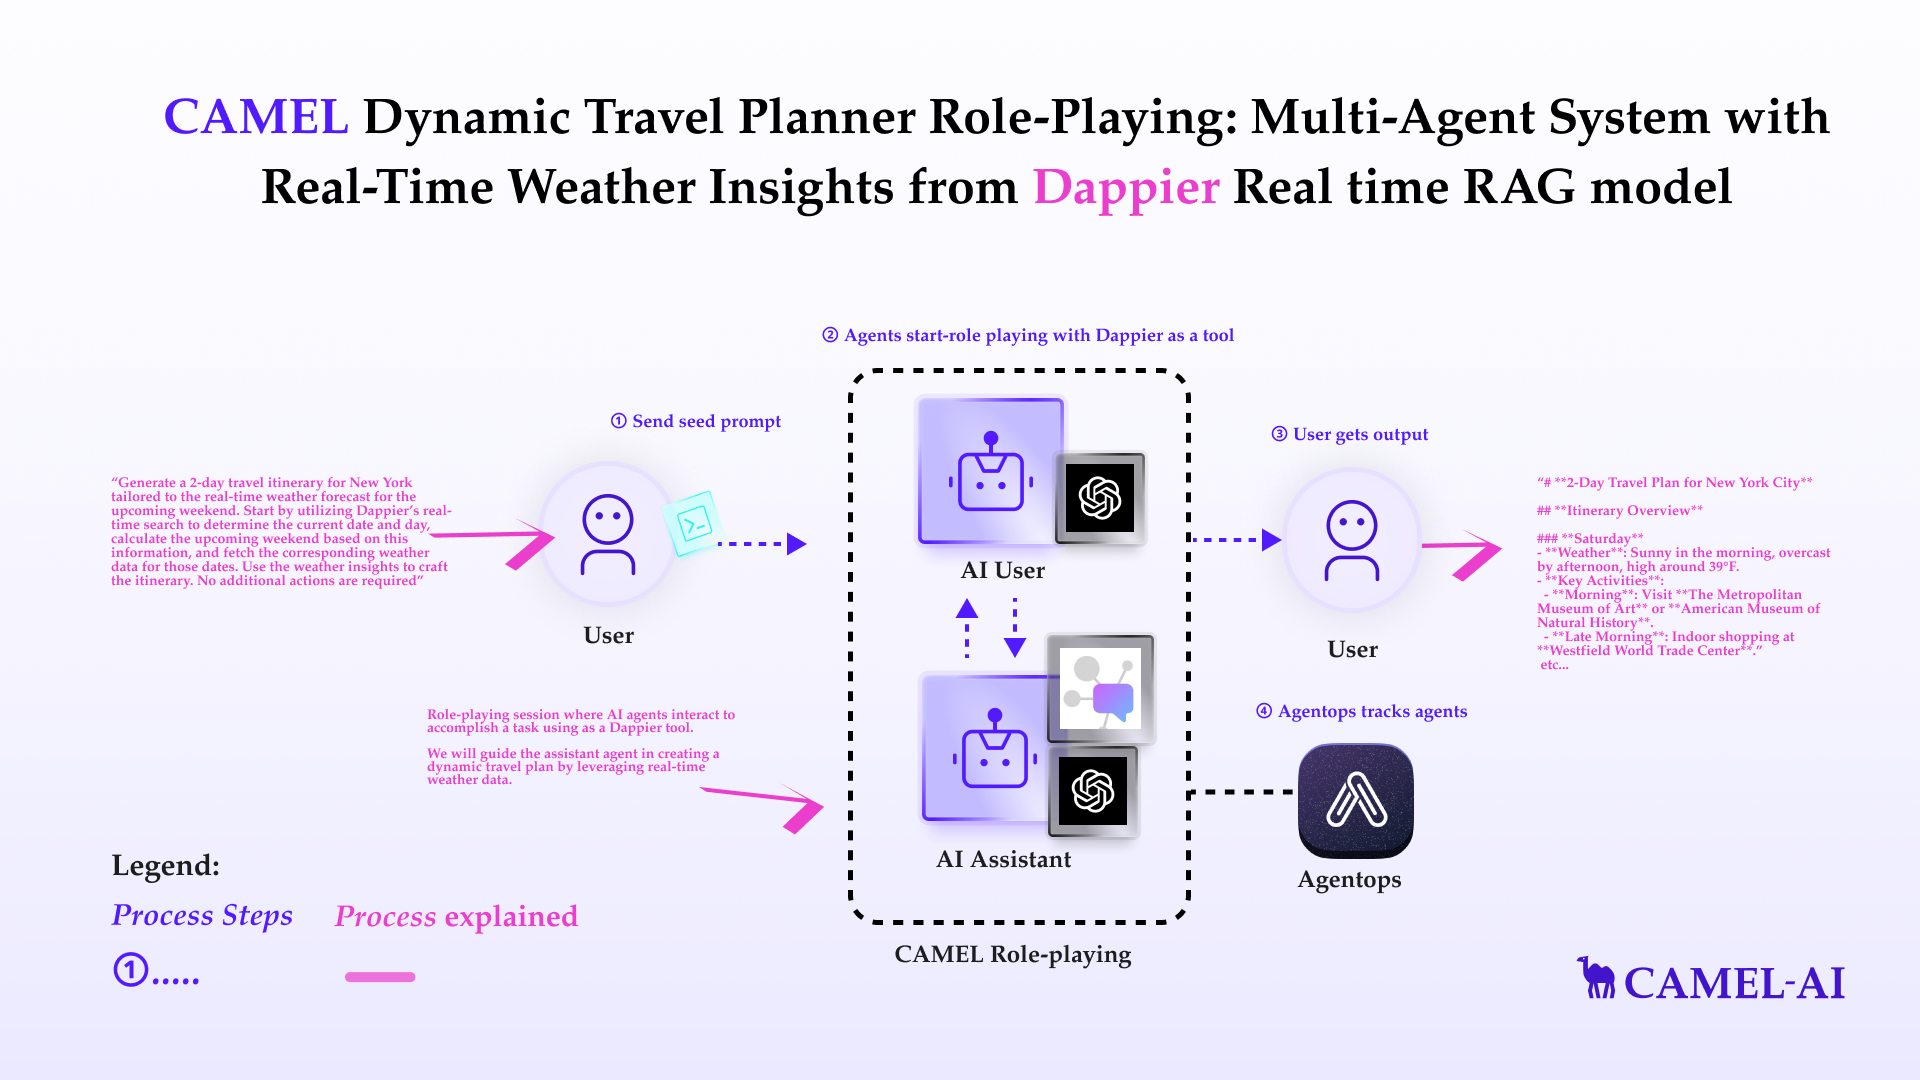

## 📦 Installation

First, install the CAMEL package with all its dependencies:

In [ ]:
!pip install "camel-ai[all]==0.2.16"

## 🔑 Setting Up API Keys

You'll need to set up your API keys for OpenAI, Dappier and AgentOps.
This ensures that the tools can interact with external services securely.

You can go to [here](https://platform.dappier.com/profile/api-keys) to get API Key from Dappier with **free** credits.

In [3]:
import os
from getpass import getpass

# Prompt for the Dappier API key securely
dappier_api_key = getpass('Enter your API key: ')
os.environ["DAPPIER_API_KEY"] = dappier_api_key

Enter your API key: ··········


Your can go to [here](https://platform.openai.com/settings/organization/api-keys) to get API Key from Open AI.

In [4]:
# Prompt for the API key securely
openai_api_key = getpass('Enter your API key: ')
os.environ["OPENAI_API_KEY"] = openai_api_key

Enter your API key: ··········


You can go to [here](https://app.agentops.ai/signin) to get **free** API Key from AgentOps


In [5]:
# Prompt for the AgentOps API key securely
agentops_api_key = getpass('Enter your API key: ')
os.environ["AGENTOPS_API_KEY"] = agentops_api_key

Enter your API key: ··········


Alternatively, if running on Colab, you could save your API keys and tokens as **Colab Secrets**, and use them across notebooks.

To do so, **comment out** the above **manual** API key prompt code block(s), and **uncomment** the following codeblock.

⚠️ Don't forget granting access to the API key you would be using to the current notebook.

In [ ]:
# import os
# from google.colab import userdata

# os.environ["DAPPIER_API_KEY"] = userdata.get("DAPPIER_API_KEY")
# os.environ["OPENAI_API_KEY"] = userdata.get("OPENAI_API_KEY")
# os.environ["AGENTOPS_API_KEY"] = userdata.get("AGENTOPS_API_KEY")

Set up the OpenAI GPT4o-mini using the CAMEL ModelFactory. You can also configure other models as needed.

In [6]:
from camel.models import ModelFactory
from camel.types import ModelPlatformType, ModelType
from camel.configs import ChatGPTConfig

# Set up model
openai_gpt4o_mini = ModelFactory.create(
    model_platform=ModelPlatformType.OPENAI,
    model_type=ModelType.GPT_4O_MINI,
    model_config_dict=ChatGPTConfig(temperature=0.2).as_dict(),
)

## 📹 Monitoring AI Agents with AgentOps

In [7]:
import agentops
agentops.init(default_tags=["CAMEL cookbook"])

🖇 AgentOps: Session Replay: https://app.agentops.ai/drilldown?session_id=c31e4378-a022-4272-adba-0e75792c87cd


## 🛰️ Access Real Time Data with Dappier

Dappier is a powerful tool that connects LLMs to real-time, rights-cleared data from trusted sources, specializing in domains like web search, finance, and news. It delivers enriched, prompt-ready data, empowering AI with verified and up-to-date information for diverse applications. In this section, we will search for the latest news related to CAMEL AI as an example.

In [8]:
from camel.toolkits import DappierToolkit

# Search for real time data from a given user query.
response = DappierToolkit().search_real_time_data(
    query="latest news on CAMEL AI"
)

print(response)

Here's the latest on CAMEL AI:

- **New Integrations:** CAMEL AI has rolled out new AI integrations and tools aimed at improving functionality and collaboration. 🚀
- **OASIS Simulator:** They've open-sourced OASIS, a next-gen simulator for realistic social media dynamics, capable of handling one million agents! 🌐
- **NeurIPS 2024:** Exciting news as three papers from CAMEL AI will be featured at NeurIPS 2024, focusing on enhancing autonomous cooperation among communicative agents. 📚
- **Data Analyst Tool:** CAMEL AI is also making waves as an AI-powered data analyst for business intelligence, allowing users to connect various data sources and ask complex questions. 📊

Stay tuned for more updates!


🎉 **Dappier effortlessly retrieves the latest news on CAMEL AI, providing valuable data for AI integration!**

## 🤖🤖  Multi-Agent Role-Playing with CAMEL

*This section sets up a role-playing session where AI agents interact to accomplish a task using Dappier tool. We will guide the assistant agent in creating a dynamic travel plan by leveraging real-time weather data.*

In [9]:
from typing import List

from colorama import Fore

from camel.agents.chat_agent import FunctionCallingRecord
from camel.societies import RolePlaying
from camel.toolkits import FunctionTool
from camel.utils import print_text_animated

Defining the Task Prompt

In [10]:
task_prompt = """Generate a 2-day travel itinerary for New York City, tailored to the real-time weather forecast for the upcoming weekend. Follow these steps:

Determine Current Date and Weekend:
Use Dappier's real-time search to identify the current date and day. Calculate the dates of the upcoming weekend based on this information.

Fetch Weather Data:
Retrieve the weather forecast for the identified weekend dates to understand the conditions for each day.

Design the Itinerary:
Use the weather insights to plan activities and destinations that suit the expected conditions. For each suggested location:

Verify whether it is free to visit or requires advance booking.
Check current traffic conditions to estimate travel times and feasibility.
Output:
Present a detailed 2-day itinerary, including timing, activities, and travel considerations. Ensure the plan is optimized for convenience and enjoyment.
"""

We will configure the assistant agent with tools for real-time weather data
retrieval.

In [11]:
dappier_tool = FunctionTool(DappierToolkit().search_real_time_data)

tool_list = [
    dappier_tool
]

assistant_model_config = ChatGPTConfig(
    tools=tool_list,
    temperature=0.0,
)

Setting Up the Role-Playing Session

In [12]:
# Initialize the role-playing session
role_play_session = RolePlaying(
    assistant_role_name="CAMEL Assistant",
    user_role_name="CAMEL User",
    assistant_agent_kwargs=dict(
        model=ModelFactory.create(
            model_platform=ModelPlatformType.OPENAI,
            model_type=ModelType.GPT_4O_MINI,
            model_config_dict=assistant_model_config.as_dict(),
        ),
        tools=tool_list,
    ),
    user_agent_kwargs=dict(model=openai_gpt4o_mini),
    task_prompt=task_prompt,
    with_task_specify=False,
)

Print the system message and task prompt

In [13]:
# Print system and task messages
print(
    Fore.GREEN
    + f"AI Assistant sys message:\n{role_play_session.assistant_sys_msg}\n"
)
print(Fore.BLUE + f"AI User sys message:\n{role_play_session.user_sys_msg}\n")

print(Fore.YELLOW + f"Original task prompt:\n{task_prompt}\n")

AI Assistant sys message:
BaseMessage(role_name='CAMEL Assistant', role_type=<RoleType.ASSISTANT: 'assistant'>, meta_dict={'task': "Generate a 2-day travel itinerary for New York City, tailored to the real-time weather forecast for the upcoming weekend. Follow these steps:\n\nDetermine Current Date and Weekend:\nUse Dappier's real-time search to identify the current date and day. Calculate the dates of the upcoming weekend based on this information.\n\nFetch Weather Data:\nRetrieve the weather forecast for the identified weekend dates to understand the conditions for each day.\n\nDesign the Itinerary:\nUse the weather insights to plan activities and destinations that suit the expected conditions. For each suggested location:\n\nVerify whether it is free to visit or requires advance booking.\nCheck current traffic conditions to estimate travel times and feasibility.\nOutput:\nPresent a detailed 2-day itinerary, including timing, activities, and travel considerations. Ensure the plan is 

Set the termination rule and start the interaction between agents

**NOTE**: This session will take approximately 6 minutes and will consume around 60k tokens by using GPT4o-mini.

In [14]:
n = 0
input_msg = role_play_session.init_chat()
while n < 20: # Limit the chat to 20 turns
    n += 1
    assistant_response, user_response = role_play_session.step(input_msg)

    if assistant_response.terminated:
        print(
            Fore.GREEN
            + (
                "AI Assistant terminated. Reason: "
                f"{assistant_response.info['termination_reasons']}."
            )
        )
        break
    if user_response.terminated:
        print(
            Fore.GREEN
            + (
                "AI User terminated. "
                f"Reason: {user_response.info['termination_reasons']}."
            )
        )
        break
    # Print output from the user
    print_text_animated(
        Fore.BLUE + f"AI User:\n\n{user_response.msg.content}\n",
        0.01
    )

    if "CAMEL_TASK_DONE" in user_response.msg.content:
        break

    # Print output from the assistant, including any function
    # execution information
    print_text_animated(Fore.GREEN + "AI Assistant:", 0.01)
    tool_calls: List[FunctionCallingRecord] = [
        FunctionCallingRecord(**call.as_dict())
        for call in assistant_response.info['tool_calls']
    ]
    for func_record in tool_calls:
        print_text_animated(f"{func_record}", 0.01)
    print_text_animated(f"{assistant_response.msg.content}\n", 0.01)

    input_msg = assistant_response.msg

AI User:

Instruction: Determine the current date and day.  
Input: None
AI Assistant:Function Execution: search_real_time_data
	Args: {'query': 'What is the current date and day?', 'ai_model_id': 'am_01j06ytn18ejftedz6dyhz2b15'}
	Result: It's Tuesday, January 14, 2025! 🎉Solution: The current date is Tuesday, January 14, 2025. 

Next request.
AI User:

Instruction: Calculate the dates of the upcoming weekend (Saturday and Sunday) based on the current date.  
Input: None
AI Assistant:Solution: Since today is Tuesday, January 14, 2025, the upcoming weekend will be:

- Saturday: January 18, 2025
- Sunday: January 19, 2025

Next request.
AI User:

Instruction: Fetch the weather forecast for January 18 and January 19, 2025, in New York City.  
Input: None
AI Assistant:Function Execution: search_real_time_data
	Args: {'query': 'Weather forecast for New York City on January 18 and January 19, 2025', 'ai_model_id': 'am_01j06ytn18ejftedz6dyhz2b15'}
	Result: Here's the weather forecast for New Y

In [15]:
# End the AgentOps session
agentops.end_session("Success")

🖇 AgentOps: Session Stats - Duration: 13m 34.0s | Cost: $0.012518 | LLMs: 31 | Tools: 16 | Actions: 0 | Errors: 0
🖇 AgentOps: Session Replay: https://app.agentops.ai/drilldown?session_id=c31e4378-a022-4272-adba-0e75792c87cd


🎉 Go to the AgentOps link shown above, you will be able to see the detailed record for this running like below.

**NOTE**: The AgentOps link is private and tied to the AgentOps account. To access the link, you'll need to run the session using your own AgentOps API Key, which will then allow you to open the link with the session's running information.

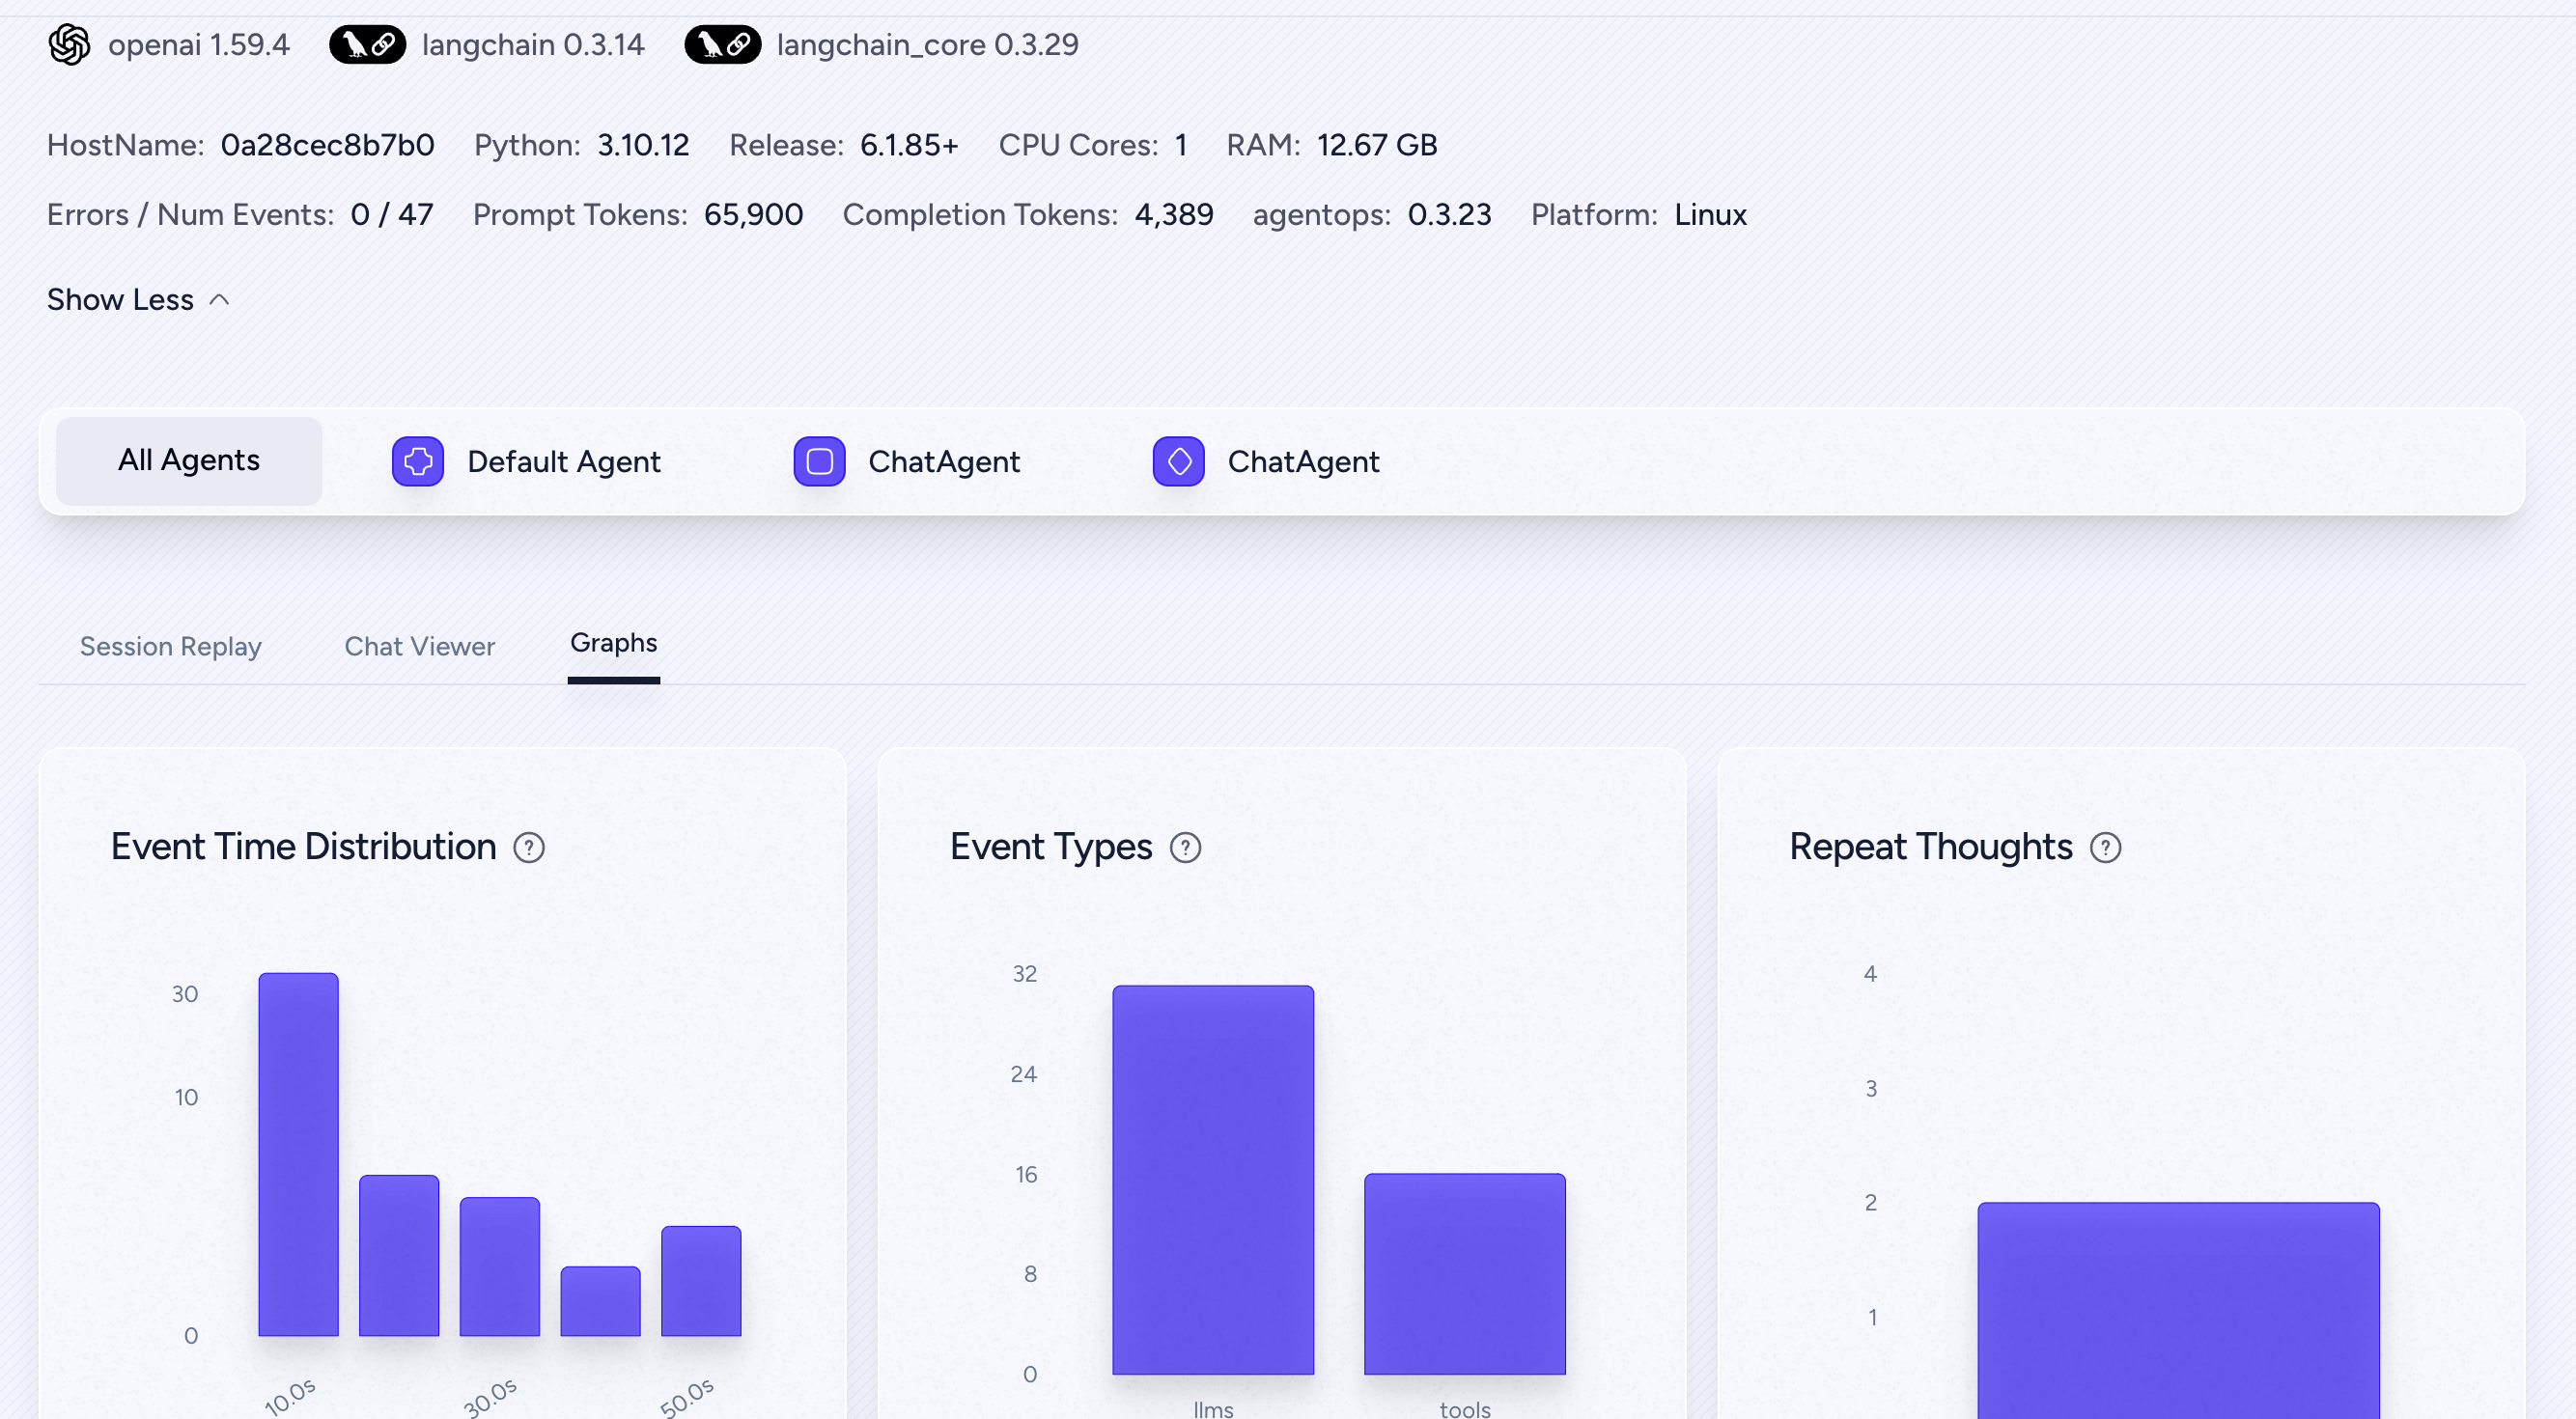

## 🌟 Highlights

This notebook has guided you through setting up and running a CAMEL RAG workflow with Dappier for a multi-agent role-playing task. You can adapt and expand this example for various other scenarios requiring advanced web information retrieval and AI collaboration.

Key tools utilized in this notebook include:

* **CAMEL**: A powerful multi-agent framework that enables Retrieval-Augmented Generation and multi-agent role-playing scenarios, allowing for sophisticated AI-driven tasks.
* **OpenAI**: A leading provider of advanced AI models capable of natural language understanding, contextual reasoning, and content generation. It enables intelligent, human-like interactions and supports a wide range of applications across various domains.
* **Dappier**: A platform connecting LLMs to real-time, rights-cleared data from trusted sources, specializing in domains like web search, finance, and news. It delivers enriched, prompt-ready data, empowering AI with verified and up-to-date information for diverse applications.
* **AgentOps**: Track and analysis the running of CAMEL Agents.

This comprehensive setup allows you to adapt and expand the example for various scenarios requiring advanced web information retrieval, AI collaboration, and multi-source data aggregation.

Check out some of our other work:

1. 🐫 Creating Your First CAMEL Agent [free Colab](https://docs.camel-ai.org/cookbooks/create_your_first_agent.html)

2.  Graph RAG Cookbook [free Colab](https://colab.research.google.com/drive/1uZKQSuu0qW6ukkuSv9TukLB9bVaS1H0U?usp=sharing)

3. 🧑‍⚖️ Create A Hackathon Judge Committee with Workforce [free Colab](https://colab.research.google.com/drive/18ajYUMfwDx3WyrjHow3EvUMpKQDcrLtr?usp=sharing)

4. 🔥 3 ways to ingest data from websites with Firecrawl & CAMEL [free Colab](https://colab.research.google.com/drive/1lOmM3VmgR1hLwDKdeLGFve_75RFW0R9I?usp=sharing)

5. 🦥 Agentic SFT Data Generation with CAMEL and Mistral Models, Fine-Tuned with Unsloth [free Colab](https://colab.research.google.com/drive/1lYgArBw7ARVPSpdwgKLYnp_NEXiNDOd-?usp=sharingg)


Thanks from everyone at 🐫 CAMEL-AI

<div class="align-center">
  <a href="https://www.camel-ai.org/"><img src="https://i.postimg.cc/KzQ5rfBC/button.png"width="150"></a>
  <a href="https://discord.camel-ai.org"><img src="https://i.postimg.cc/L4wPdG9N/join-2.png"  width="150"></a></a>
  
⭐ <i>Star us on [*Github*](https://github.com/camel-ai/camel), join our [*Discord*](https://discord.camel-ai.org) or follow our [*X*](https://x.com/camelaiorg)
</div>